In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [167]:
employee_data = pd.read_csv("output.csv")
employee_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [168]:
employee_data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
Job Satisfaction level      0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

In [169]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# __Checking the datatypes__

In [170]:
column_types = employee_data.dtypes

In [171]:
column_types 

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
Job Satisfaction level      object
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel    

In [172]:
column_names = employee_data.columns

In [173]:
column_names

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'Job Satisfaction level', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# **Checking Attrtion**

In [174]:
employee_data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

# __Replace "Yes" with 1 and "No" with 0 in Attrition column__

In [175]:
employee_data.replace({'Attrition':{'Yes':1, 'No':0}}, inplace=True)

# __Splitting the data into numerical and categorical values__

In [176]:
numerical_df = employee_data.select_dtypes(include=[np.number])
categorical_df = employee_data.select_dtypes(include=['object'])

In [177]:
numerical_df = numerical_df.reset_index(drop=True) 

In [178]:
numerical_df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,1,1,2,94,3,...,1,80,0,8,0,1,6,4,0,5
1,49,0,279,8,1,1,2,3,61,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,1,4,4,92,2,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,1,5,4,56,3,...,3,80,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,7,1,40,3,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,41,4,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,613,6,1,1,2062,4,42,2,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,155,4,3,1,2064,2,87,4,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1023,2,3,1,2065,4,63,2,...,4,80,0,17,3,2,9,6,0,8


In [179]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   BusinessTravel          1470 non-null   object
 1   Department              1470 non-null   object
 2   EducationField          1470 non-null   object
 3   Gender                  1470 non-null   object
 4   JobRole                 1470 non-null   object
 5   Job Satisfaction level  1470 non-null   object
 6   MaritalStatus           1470 non-null   object
 7   Over18                  1470 non-null   object
 8   OverTime                1470 non-null   object
dtypes: object(9)
memory usage: 103.5+ KB


In [180]:
categorical_df.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'Job Satisfaction level', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [181]:
categorical_df = categorical_df.reset_index(drop=True) 

In [182]:
categorical_df

,BusinessTravel,Department,EducationField,Gender,JobRole,Job Satisfaction level,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Low,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Medium,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Low,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Low,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Medium,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Low,Married,Y,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,High,Married,Y,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Medium,Married,Y,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Medium,Married,Y,No


# __Get Dummies to transform Categorical Variables__

In [183]:
dummy_nominals = ['BusinessTravel', 'Department','EducationField','Gender','JobRole','Job Satisfaction level','MaritalStatus','Over18','OverTime']
categorical_df = pd.get_dummies(categorical_df, columns=dummy_nominals, dtype="int64")

In [184]:
categorical_df

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Sales Representative,Job Satisfaction level_High,Job Satisfaction level_Low,Job Satisfaction level_Medium,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,1,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,1,1,0
1466,0,0,1,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,1,1,0
1467,0,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,1
1468,0,1,0,0,0,1,0,0,0,1,...,0,0,0,1,0,1,0,1,1,0


In [185]:
numerical_df = numerical_df.reset_index(drop=True) 
numerical_df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [186]:
numerical_df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,1,1,2,94,3,...,1,80,0,8,0,1,6,4,0,5
1,49,0,279,8,1,1,2,3,61,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,1,4,4,92,2,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,1,5,4,56,3,...,3,80,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,7,1,40,3,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,41,4,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,613,6,1,1,2062,4,42,2,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,155,4,3,1,2064,2,87,4,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1023,2,3,1,2065,4,63,2,...,4,80,0,17,3,2,9,6,0,8


# **We concatenate our data**

In [187]:
df_transformed = pd.concat([numerical_df, categorical_df], axis=1)

In [188]:
df_transformed 

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Sales Representative,Job Satisfaction level_High,Job Satisfaction level_Low,Job Satisfaction level_Medium,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,1,1,2,94,3,...,0,0,1,0,0,0,1,1,0,1
1,49,0,279,8,1,1,2,3,61,2,...,0,0,0,1,0,1,0,1,1,0
2,37,1,1373,2,2,1,4,4,92,2,...,0,0,1,0,0,0,1,1,0,1
3,33,0,1392,3,4,1,5,4,56,3,...,0,0,1,0,0,1,0,1,0,1
4,27,0,591,2,1,1,7,1,40,3,...,0,0,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,41,4,...,0,0,1,0,0,1,0,1,1,0
1466,39,0,613,6,1,1,2062,4,42,2,...,0,1,0,0,0,1,0,1,1,0
1467,27,0,155,4,3,1,2064,2,87,4,...,0,0,0,1,0,1,0,1,0,1
1468,49,0,1023,2,3,1,2065,4,63,2,...,0,0,0,1,0,1,0,1,1,0


df_transformed.info()

# **Splitting the data into test and train**

In [189]:
df_transformed.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender

In [190]:
X=df_transformed.drop(columns=['Attrition'])
y=df_transformed['Attrition']


In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# **Applying Logistic Regression Classification**

In [192]:
classifier = LogisticRegression(random_state=0)

In [193]:
classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [194]:
classifier.score(X,y)

0.8414965986394558

In [203]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred_train_log = log_model.predict(X_train)
y_pred_test_log = log_model.predict(X_test)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Error_metric,Train,Test
0,Accuracy,0.842687,0.836735
1,Precision,0.800000,1.000000
2,Recall,0.021277,0.020408


# **Confusion Matrix**

In [204]:
len(y_pred_train_log)

1176

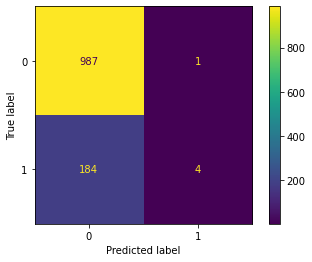

In [205]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm_train = confusion_matrix(y_train, y_pred_train_log, labels = log_model.classes_)
disp = ConfusionMatrixDisplay(cm_train)
disp.plot()


In [206]:
sample=pd.DataFrame(X_test).sample()

In [207]:
log_model.predict_proba(sample)

array([[0.93091704, 0.06908296]])

In [208]:
predict = log_model.predict(X_test)

# **Train data Accuracy**

In [209]:
print("Train data Accuracy :", log_model.score(X_train, y_train))

Train data Accuracy : 0.842687074829932


# **Test data Accuracy**

In [210]:
print("Test data Accuracy :", log_model.score(X_test, y_test))

Test data Accuracy : 0.8367346938775511


In [60]:
#print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       245
           1       1.00      0.02      0.04        49

    accuracy                           0.84       294
   macro avg       0.92      0.51      0.48       294
weighted avg       0.86      0.84      0.77       294



# Applying SMOTE to balance the data

In [211]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [212]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

In [213]:
log_model = LogisticRegression()
log_model.fit(X_sm, y_sm)

y_pred_train_log = log_model.predict(X_sm)
y_pred_test_log = log_model.predict(X_test)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_sm, y_pred_train_log),
                                         precision_score(y_sm, y_pred_train_log),
                                         recall_score(y_sm, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Error_metric,Train,Test
0,Accuracy,0.674371,0.653061
1,Precision,0.662879,0.256881
2,Recall,0.709651,0.571429


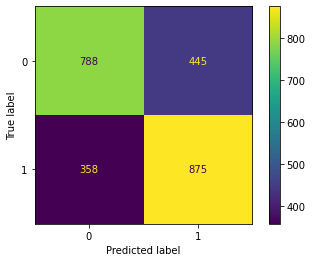

In [214]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_train = confusion_matrix(y_sm, y_pred_train_log, labels = log_model.classes_)
disp = ConfusionMatrixDisplay(cm_train)
disp.plot()